In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


#Given Dataset

In [ ]:
dp_df = pd.read_csv('/content/drive/MyDrive/dp_final_articles.csv')
dp_df

,id,srn,title,slug,content,published_date,title_url,source,pageViews
0,142732,166eff0e-c9b4-4990-9dfe-a3e694414425,Cramped class requirements limit nurses and en...,study-abroad-by-the-numbers,"For many students, study abroad is an integral...",1970-01-01 06:00:00,1970/01/study-abroad-by-the-numbers,dp,429.0
1,142263,17dc519b-d72a-4237-8537-c162b622352b,New Study Abroad Director eager to expand and ...,new-abroad-director,“Tell me about France!” Nigel Cossar exclaims ...,1970-01-01 12:00:00,1970/01/new-abroad-director,dp,206.0
2,142685,01b12122-5935-4297-9270-7110f1bc61db,Emergencies abroad: how Penn keeps students safe,penn-abroad-deals-with-emergencies-overseas,"When disaster struck in Paris last week, Penn ...",1970-01-02 00:00:00,1970/01/penn-abroad-deals-with-emergencies-ove...,dp,259.0
3,144409,9ecaf929-0a2a-476f-abce-cd8ba884d28d,The challenges of finding a long-term provider...,caps-referrals-for-long-term-care,While Counseling and Psychological Services fu...,1970-01-02 02:00:00,1970/01/caps-referrals-for-long-term-care,dp,176.0
4,67904,36df6619-9184-45fc-8842-63e417954645,Nine faculty members awarded for teaching,nine_faculty_members_awarded_for_teaching,"This year's winners of the Lindback Award, the...",1990-04-17 09:00:00,1990/04/nine_faculty_members_awarded_for_teaching,dp,8.0
...,...,...,...,...,...,...,...,...,...
68882,204845,fe54e7ee-11d1-4026-aea5-235fe2ed484b,Gregory Bowman named Penn Integrates Knowledge...,penn-integrates-knowledge-gregory-bowman-engin...,"The University appointed Gregory Bowman, a pro...",2023-04-06 23:17:20,2023/04/penn-integrates-knowledge-gregory-bowm...,dp,77.0
68883,204957,ee7e9fe8-cbd4-4b20-95ef-3aa541008717,"Losing every game, loving every moment: Mike M...",penn-womens-basketball-coach-mike-mclaughlin-w...,Long before Mike McLaughlin strode the sidelin...,2023-04-07 00:08:09,2023/04/penn-womens-basketball-coach-mike-mcla...,dp,299.0
68884,204956,af45a9a1-1760-4fcd-85d7-dd56c0d3128c,Jonathan Condon of men’s rowing is racing to t...,penn-mens-rowing-captain-jonathan-condon-heavy...,Adaptability has been a prominent theme of hea...,2023-04-07 01:05:46,2023/04/penn-mens-rowing-captain-jonathan-cond...,dp,268.0
68885,204973,31b3d3c4-b771-42bc-8fb1-a87d8af3bf4b,"Penn holds i care training, teaching students ...",penn-i-care-training-counseling-mental-health,Penn held a training session for students that...,2023-04-07 02:54:38,2023/04/penn-i-care-training-counseling-mental...,dp,123.0


# Using SPARK to tokenize and get top keywords

In [ ]:
!apt install libkrb5-dev
!pip install sparkmagic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.17-6ubuntu4.3).
libkrb5-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependen

In [ ]:
%load_ext sparkmagic.magics

In [ ]:
# You need to edit link, username, and password below

# %spark add -s spark_session -l python -u http://ec2-44-202-7-85.compute-1.amazonaws.com/ -a USERNAME -p PASSWORD -t Basic_Access

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
3,application_1682201328047_0004,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


In [ ]:
import pandas as pd
import numpy as np

dp_df = pd.read_csv('/content/drive/MyDrive/dp_final_articles.csv')
dp_df

,id,srn,title,slug,content,published_date,title_url,source,pageViews
0,142732,166eff0e-c9b4-4990-9dfe-a3e694414425,Cramped class requirements limit nurses and en...,study-abroad-by-the-numbers,"For many students, study abroad is an integral...",1970-01-01 06:00:00,1970/01/study-abroad-by-the-numbers,dp,429.0
1,142263,17dc519b-d72a-4237-8537-c162b622352b,New Study Abroad Director eager to expand and ...,new-abroad-director,“Tell me about France!” Nigel Cossar exclaims ...,1970-01-01 12:00:00,1970/01/new-abroad-director,dp,206.0
2,142685,01b12122-5935-4297-9270-7110f1bc61db,Emergencies abroad: how Penn keeps students safe,penn-abroad-deals-with-emergencies-overseas,"When disaster struck in Paris last week, Penn ...",1970-01-02 00:00:00,1970/01/penn-abroad-deals-with-emergencies-ove...,dp,259.0
3,144409,9ecaf929-0a2a-476f-abce-cd8ba884d28d,The challenges of finding a long-term provider...,caps-referrals-for-long-term-care,While Counseling and Psychological Services fu...,1970-01-02 02:00:00,1970/01/caps-referrals-for-long-term-care,dp,176.0
4,67904,36df6619-9184-45fc-8842-63e417954645,Nine faculty members awarded for teaching,nine_faculty_members_awarded_for_teaching,"This year's winners of the Lindback Award, the...",1990-04-17 09:00:00,1990/04/nine_faculty_members_awarded_for_teaching,dp,8.0
...,...,...,...,...,...,...,...,...,...
68882,204845,fe54e7ee-11d1-4026-aea5-235fe2ed484b,Gregory Bowman named Penn Integrates Knowledge...,penn-integrates-knowledge-gregory-bowman-engin...,"The University appointed Gregory Bowman, a pro...",2023-04-06 23:17:20,2023/04/penn-integrates-knowledge-gregory-bowm...,dp,77.0
68883,204957,ee7e9fe8-cbd4-4b20-95ef-3aa541008717,"Losing every game, loving every moment: Mike M...",penn-womens-basketball-coach-mike-mclaughlin-w...,Long before Mike McLaughlin strode the sidelin...,2023-04-07 00:08:09,2023/04/penn-womens-basketball-coach-mike-mcla...,dp,299.0
68884,204956,af45a9a1-1760-4fcd-85d7-dd56c0d3128c,Jonathan Condon of men’s rowing is racing to t...,penn-mens-rowing-captain-jonathan-condon-heavy...,Adaptability has been a prominent theme of hea...,2023-04-07 01:05:46,2023/04/penn-mens-rowing-captain-jonathan-cond...,dp,268.0
68885,204973,31b3d3c4-b771-42bc-8fb1-a87d8af3bf4b,"Penn holds i care training, teaching students ...",penn-i-care-training-counseling-mental-health,Penn held a training session for students that...,2023-04-07 02:54:38,2023/04/penn-i-care-training-counseling-mental...,dp,123.0


In [ ]:
!pip install pyspark
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=a301f3b71d6a3bf202c76c12f88e6952439586c569dabc9aac7739d9532b46ad
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession

appName = "PySpark"

spark = SparkSession.builder.appName(appName).getOrCreate()

In [ ]:
dp_df['content'] = dp_df['content'].astype('str')

In [ ]:
import spacy
from collections import Counter
from string import punctuation
nlp = spacy.load("en_core_web_sm")


In [ ]:
dp_df = dp_df.reset_index()

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import udf

In [ ]:
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    counter = Counter(result)
    return [word for word, count in counter.most_common(5)]

get_hotwords_udf = udf(get_hotwords, ArrayType(StringType()))

from pyspark.sql import SparkSession

#split the df into 7
dfs = []
start = 0
for i in range(7):
    end = start + 10000 #10 thousand each
    if i == 6:
        end = len(dp_df)
    dfs.append(dp_df.iloc[start:end])
    start = end

spark = SparkSession.builder.appName("split-dataframe").getOrCreate()

# Convert pandas to Spark
spark_df_1 = spark.createDataFrame(dfs[0])
spark_df_2 = spark.createDataFrame(dfs[1])
spark_df_3 = spark.createDataFrame(dfs[2])
spark_df_4 = spark.createDataFrame(dfs[3])
spark_df_5 = spark.createDataFrame(dfs[4])
spark_df_6 = spark.createDataFrame(dfs[5])
spark_df_7 = spark.createDataFrame(dfs[6])


#apply tokenizer method
spark_df_1 = spark_df_1.withColumn("keywords", get_hotwords_udf("content"))
spark_df_2 = spark_df_2.withColumn("keywords", get_hotwords_udf("content"))
spark_df_3 = spark_df_3.withColumn("keywords", get_hotwords_udf("content"))
spark_df_4 = spark_df_4.withColumn("keywords", get_hotwords_udf("content"))
spark_df_5 = spark_df_5.withColumn("keywords", get_hotwords_udf("content"))
spark_df_6 = spark_df_6.withColumn("keywords", get_hotwords_udf("content"))
spark_df_7 = spark_df_7.withColumn("keywords", get_hotwords_udf("content"))

In [ ]:
spark_df_1 = spark_df_1.toPandas()
spark_df_1.to_csv('dp_articles_first_ten_thousand.csv', index=False)
spark_df_2 = spark_df_2.toPandas()
spark_df_2.to_csv('dp_articles_second_ten_thousand.csv', index=False)
spark_df_3 = spark_df_3.toPandas()
spark_df_3.to_csv('dp_articles_third_ten_thousand.csv', index=False)
spark_df_4 = spark_df_4.toPandas()
spark_df_4.to_csv('dp_articles_fourth_ten_thousand.csv', index=False)
spark_df_5 = spark_df_5.toPandas()
spark_df_5.to_csv('dp_articles_fifth_ten_thousand.csv', index=False)
spark_df_6 = spark_df_6.toPandas()
spark_df_6.to_csv('dp_articles_sixth_ten_thousand.csv', index=False)
spark_df_7 = spark_df_7.toPandas()
spark_df_7.to_csv('dp_articles_seventh_ten_thousand.csv', index=False)

In [ ]:
# read CSV file
df_list = []

df = pd.read_csv("/content/drive/MyDrive/dp_articles_first_ten_thousand.csv")
df_list.append(df)
df = pd.read_csv("/content/drive/MyDrive/dp_articles_second_ten_thousand.csv")
df_list.append(df)
df = pd.read_csv("/content/drive/MyDrive/dp_articles_third_ten_thousand.csv")
df_list.append(df)
df = pd.read_csv("/content/drive/MyDrive/dp_articles_fourth_ten_thousand.csv")
df_list.append(df)
df = pd.read_csv("/content/drive/MyDrive/dp_articles_fifth_ten_thousand.csv")
df_list.append(df)
df = pd.read_csv("/content/drive/MyDrive/dp_articles_sixth_ten_thousand.csv")
df_list.append(df)
df = pd.read_csv("/content/drive/MyDrive/dp_articles_seventh_ten_thousand.csv")
df_list.append(df)

# merge parts
combined_df = pd.concat(df_list, ignore_index=True)
combined_df.to_csv('dp_combined_tokenized.csv', index=False)

In [ ]:
combined_df

,index,id,srn,title,slug,content,published_date,title_url,source,pageViews,keywords
0,0,142732,166eff0e-c9b4-4990-9dfe-a3e694414425,Cramped class requirements limit nurses and en...,study-abroad-by-the-numbers,"For many students, study abroad is an integral...",1970-01-01 06:00:00,1970/01/study-abroad-by-the-numbers,dp,429.0,"['students', 'study', 'penn', 'program', 'expe..."
1,1,142263,17dc519b-d72a-4237-8537-c162b622352b,New Study Abroad Director eager to expand and ...,new-abroad-director,“Tell me about France!” Nigel Cossar exclaims ...,1970-01-01 12:00:00,1970/01/new-abroad-director,dp,206.0,"['penn', 'cossar', 'students', 'programs', 'un..."
2,2,142685,01b12122-5935-4297-9270-7110f1bc61db,Emergencies abroad: how Penn keeps students safe,penn-abroad-deals-with-emergencies-overseas,"When disaster struck in Paris last week, Penn ...",1970-01-02 00:00:00,1970/01/penn-abroad-deals-with-emergencies-ove...,dp,259.0,"['penn', 'students', 'paris', 'email', 'securi..."
3,3,144409,9ecaf929-0a2a-476f-abce-cd8ba884d28d,The challenges of finding a long-term provider...,caps-referrals-for-long-term-care,While Counseling and Psychological Services fu...,1970-01-02 02:00:00,1970/01/caps-referrals-for-long-term-care,dp,176.0,"['students', 'caps', 'penn', 'insurance', 'care']"
4,4,67904,36df6619-9184-45fc-8842-63e417954645,Nine faculty members awarded for teaching,nine_faculty_members_awarded_for_teaching,"This year's winners of the Lindback Award, the...",1990-04-17 09:00:00,1990/04/nine_faculty_members_awarded_for_teaching,dp,8.0,"['award', 'professor', 'winners', 'candidates'..."
...,...,...,...,...,...,...,...,...,...,...,...
68882,68882,204845,fe54e7ee-11d1-4026-aea5-235fe2ed484b,Gregory Bowman named Penn Integrates Knowledge...,penn-integrates-knowledge-gregory-bowman-engin...,"The University appointed Gregory Bowman, a pro...",2023-04-06 23:17:20,2023/04/penn-integrates-knowledge-gregory-bowm...,dp,77.0,"['bowman', 'penn', 'university', 'professor', ..."
68883,68883,204957,ee7e9fe8-cbd4-4b20-95ef-3aa541008717,"Losing every game, loving every moment: Mike M...",penn-womens-basketball-coach-mike-mclaughlin-w...,Long before Mike McLaughlin strode the sidelin...,2023-04-07 00:08:09,2023/04/penn-womens-basketball-coach-mike-mcla...,dp,299.0,"['mclaughlin', 'basketball', 'coach', 'general..."
68884,68884,204956,af45a9a1-1760-4fcd-85d7-dd56c0d3128c,Jonathan Condon of men’s rowing is racing to t...,penn-mens-rowing-captain-jonathan-condon-heavy...,Adaptability has been a prominent theme of hea...,2023-04-07 01:05:46,2023/04/penn-mens-rowing-captain-jonathan-cond...,dp,268.0,"['condon', 'penn', 'sport', 'rowing', 'team']"
68885,68885,204973,31b3d3c4-b771-42bc-8fb1-a87d8af3bf4b,"Penn holds i care training, teaching students ...",penn-i-care-training-counseling-mental-health,Penn held a training session for students that...,2023-04-07 02:54:38,2023/04/penn-i-care-training-counseling-mental...,dp,123.0,"['training', 'penn', 'spiegel', 'students', 'a..."


# EDA STUFF

## Tokenizer for content length

In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/dp_final_articles.csv')
df

,id,srn,title,slug,content,published_date,title_url,source,pageViews
0,142732,166eff0e-c9b4-4990-9dfe-a3e694414425,Cramped class requirements limit nurses and en...,study-abroad-by-the-numbers,"For many students, study abroad is an integral...",1970-01-01 06:00:00,1970/01/study-abroad-by-the-numbers,dp,429.0
1,142263,17dc519b-d72a-4237-8537-c162b622352b,New Study Abroad Director eager to expand and ...,new-abroad-director,“Tell me about France!” Nigel Cossar exclaims ...,1970-01-01 12:00:00,1970/01/new-abroad-director,dp,206.0
2,142685,01b12122-5935-4297-9270-7110f1bc61db,Emergencies abroad: how Penn keeps students safe,penn-abroad-deals-with-emergencies-overseas,"When disaster struck in Paris last week, Penn ...",1970-01-02 00:00:00,1970/01/penn-abroad-deals-with-emergencies-ove...,dp,259.0
3,144409,9ecaf929-0a2a-476f-abce-cd8ba884d28d,The challenges of finding a long-term provider...,caps-referrals-for-long-term-care,While Counseling and Psychological Services fu...,1970-01-02 02:00:00,1970/01/caps-referrals-for-long-term-care,dp,176.0
4,67904,36df6619-9184-45fc-8842-63e417954645,Nine faculty members awarded for teaching,nine_faculty_members_awarded_for_teaching,"This year's winners of the Lindback Award, the...",1990-04-17 09:00:00,1990/04/nine_faculty_members_awarded_for_teaching,dp,8.0
...,...,...,...,...,...,...,...,...,...
68882,204845,fe54e7ee-11d1-4026-aea5-235fe2ed484b,Gregory Bowman named Penn Integrates Knowledge...,penn-integrates-knowledge-gregory-bowman-engin...,"The University appointed Gregory Bowman, a pro...",2023-04-06 23:17:20,2023/04/penn-integrates-knowledge-gregory-bowm...,dp,77.0
68883,204957,ee7e9fe8-cbd4-4b20-95ef-3aa541008717,"Losing every game, loving every moment: Mike M...",penn-womens-basketball-coach-mike-mclaughlin-w...,Long before Mike McLaughlin strode the sidelin...,2023-04-07 00:08:09,2023/04/penn-womens-basketball-coach-mike-mcla...,dp,299.0
68884,204956,af45a9a1-1760-4fcd-85d7-dd56c0d3128c,Jonathan Condon of men’s rowing is racing to t...,penn-mens-rowing-captain-jonathan-condon-heavy...,Adaptability has been a prominent theme of hea...,2023-04-07 01:05:46,2023/04/penn-mens-rowing-captain-jonathan-cond...,dp,268.0
68885,204973,31b3d3c4-b771-42bc-8fb1-a87d8af3bf4b,"Penn holds i care training, teaching students ...",penn-i-care-training-counseling-mental-health,Penn held a training session for students that...,2023-04-07 02:54:38,2023/04/penn-i-care-training-counseling-mental...,dp,123.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## General EDA

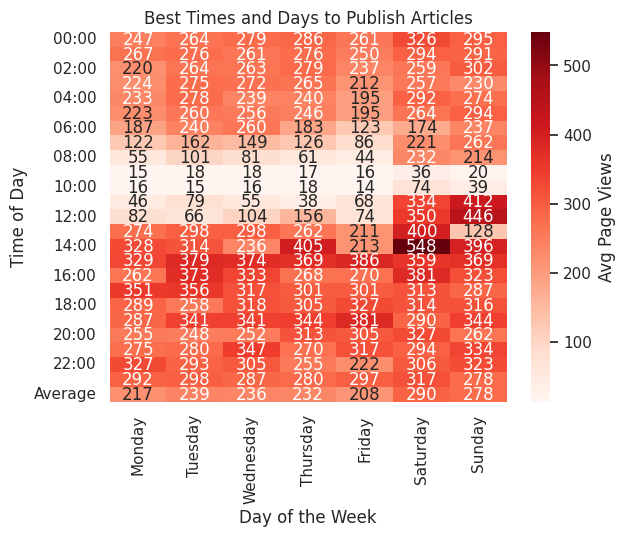

In [ ]:
# Create hour and day columns
df_copy = df.copy()
df_copy['published_date'] = pd.to_datetime(df_copy['published_date'])
df_copy['hour'] = df_copy['published_date'].dt.strftime('%H:00')
df_copy['day'] = pd.Categorical(df_copy['published_date'].dt.day_name(), 
                                 categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                 ordered=True)

# Remove [ageViews outliers (IQR)
Q1 = df_copy['pageViews'].quantile(0.25)
Q3 = df_copy['pageViews'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_copy = df_copy[(df_copy['pageViews'] > lower_bound) & (df_copy['pageViews'] < upper_bound)]

# Generate heatmap
heatmap_df = pd.pivot_table(df_copy, values='pageViews', index=['hour'], columns=['day'], aggfunc='mean')
average_views = heatmap_df.mean(axis=0)
heatmap_df.loc['Average'] = average_views

# Plot
sns.set()
heatmap = sns.heatmap(heatmap_df, cmap='Reds', annot=True, fmt='.0f')
heatmap.set_title('Best Times and Days to Publish Articles')
heatmap.set_xlabel('Day of the Week')
heatmap.set_ylabel('Time of Day')

cbar = heatmap.collections[0].colorbar
cbar.set_label('Avg Page Views')



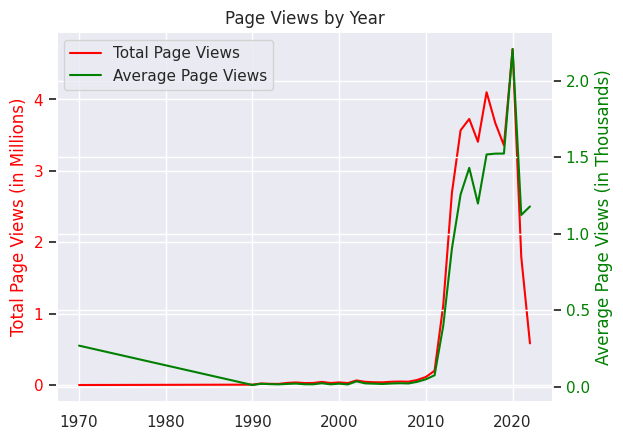

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create year column
df_copy2 = df.copy()
df_copy2['published_date'] = pd.to_datetime(df_copy2['published_date'])
df_copy2['year'] = df_copy2['published_date'].dt.year

# Get total yearly views and avg yearly views, minus 2023
yearly_views = df_copy2.groupby('year')['pageViews'].sum() / 1000000
yearly_avg_views = df_copy2.groupby('year')['pageViews'].mean() / 1000
yearly_views = yearly_views[yearly_views.index != 2023]
yearly_avg_views = yearly_avg_views[yearly_avg_views.index != 2023]

#Plot it
fig, ax1 = plt.subplots()

ax1.plot(yearly_views.index, yearly_views.values, color='red', label='Total Page Views')
ax1.set_ylabel('Total Page Views (in Millions)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

ax2.plot(yearly_avg_views.index, yearly_avg_views.values, color='green', label='Average Page Views')
ax2.set_ylabel('Average Page Views (in Thousands)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.xlabel('Year')
plt.title('Page Views by Year')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='best')

plt.show()




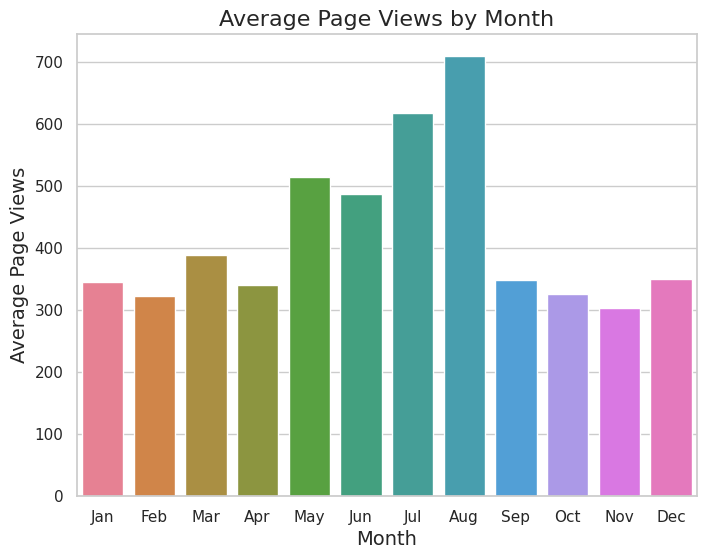

In [ ]:
#Create month column
df_copy2 = df.copy()
df_copy2['published_date'] = pd.to_datetime(df_copy2['published_date'])
df_copy2['month'] = df_copy2['published_date'].dt.month

# Calculate mean and standard deviation
mean = df_copy2['pageViews'].mean()
std = df_copy2['pageViews'].std()

# Remove outliers more than 3 std from the mean
df_copy2 = df_copy2[(df_copy2['pageViews'] > mean - 3 * std) & (df_copy2['pageViews'] < mean + 3 * std)]

# Get average views per month
monthly_avg_views = df_copy2.groupby('month')['pageViews'].mean()

# Plot it
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

colors = sns.color_palette("husl", 12)
ax = sns.barplot(x=monthly_avg_views.index, y=monthly_avg_views.values, palette=colors)

ax.set_title("Average Page Views by Month", fontsize=16)
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Average Page Views", fontsize=14)

month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
ax.set_xticklabels(month_names)

plt.show()


In [ ]:
import plotly.express as px

# Get tokenized_df keywords, from 2000 to 2022
tokenized_df = pd.read_csv('/content/drive/My Drive/dp_combined_tokenized.csv')

tokenized_df = tokenized_df[['id', 'published_date', 'keywords']]
tokenized_df['published_date'] = pd.to_datetime(tokenized_df['published_date'])

tokenized_df = tokenized_df[tokenized_df['published_date'].dt.year >= 2000]
tokenized_df = tokenized_df[tokenized_df['published_date'].dt.year <= 2022]


In [ ]:
# Getting keyword counts by year by iterating through each keyword array
keyword_counts = []

for index, row in tokenized_df.iterrows():
    year = pd.to_datetime(row['published_date']).year
    
    for keyword in row['keywords'].replace('[','').replace(']','').replace("'",'').split(', '):
        existing_keyword = next((x for x in keyword_counts if x['year'] == year and x['keyword'] == keyword), None)
        if existing_keyword:
            existing_keyword['count'] += 1
        else:
 
            keyword_counts.append({'year': year, 'keyword': keyword, 'count': 1})

keyword_counts_df = pd.DataFrame(keyword_counts)
keyword_counts_df

,year,keyword,count
0,2000,carnaroli,1
1,2000,university,213
2,2000,penn,791
3,2000,president,30
4,2000,position,4
...,...,...,...
64966,2022,junior,1
64967,2022,guard,2
64968,2022,gilbert,1
64969,2022,auditory,1


In [ ]:
# Getting the total number of articles per year
tokenized_df = pd.read_csv('/content/drive/My Drive/dp_combined_tokenized.csv')
tokenized_df['published_date'] = pd.to_datetime(tokenized_df['published_date'])
tokenized_df['year'] = tokenized_df['published_date'].dt.year
tokenized_df = tokenized_df[tokenized_df['published_date'].dt.year >= 2000]
tokenized_df = tokenized_df[tokenized_df['published_date'].dt.year <= 2022]

articles_per_year = tokenized_df.groupby('year')['id'].count()
articles_per_year_df = articles_per_year.to_frame().rename(columns={'id': 'num_articles'})
articles_per_year_df

,num_articles
year,
2000,1986
2001,2063
2002,1898
2003,2215
2004,2117
2005,2272
2006,2340
2007,2298
2008,2354


In [ ]:
# Keyword count / articles per year to get % occurenc eof the keyword
merged_df = pd.merge(keyword_counts_df, articles_per_year_df, on='year')
merged_df['ratio'] = merged_df['count'] / merged_df['num_articles']

final_df = merged_df[['keyword', 'year', 'ratio']]
final_df = final_df.sort_values('ratio', ascending=False)
final_df


,keyword,year,ratio
57157,penn,2019,0.530640
64003,penn,2022,0.526210
62017,penn,2021,0.515664
54550,penn,2018,0.501660
59696,penn,2020,0.488274
...,...,...,...
40217,historical,2013,0.000335
40216,preservation,2013,0.000335
40211,wrestlers,2013,0.000335
40210,drawings,2013,0.000335


In [ ]:
# Get the top keywords by their highest peak
top_keywords = final_df.groupby('keyword').max().nlargest(10, 'ratio').index.tolist()

# Filter data for only the top 10 keywords, multiply ratio into a percentage
filtered_df = final_df[final_df['keyword'].apply(lambda x: x in top_keywords)]
filtered_df = filtered_df.sort_values('year', ascending=True)
filtered_df['ratio'] = filtered_df['ratio'] * 100

avg_ratios = filtered_df.groupby('keyword')['ratio'].mean().reset_index()
ordered_keywords = avg_ratios.sort_values('ratio', ascending=False)['keyword'].tolist()

# Plot it
fig = px.line(filtered_df, x='year', y='ratio', color='keyword', category_orders={'keyword': ordered_keywords},
              line_group='keyword', 
              line_shape='spline',
              render_mode='svg', 
              )
fig.update_layout(title='Percent Occurrence in Articles of 10 Most Common Keywords by Year',
                  yaxis_title='Occurrence (%)',
                  xaxis_title='Year')
fig.show()

In [ ]:

final_df = final_df.sort_values(['year', 'keyword'])
change_df = pd.DataFrame(columns=['year', 'keyword', 'change'])

# Iterate year by year, calculate change from previous year to current
for year in final_df['year'].unique():
    current_year = final_df[final_df['year'] == year - 1]
    next_year = final_df[final_df['year'] == year]
    merged = pd.merge(current_year, next_year, on='keyword', suffixes=['_current', '_next'])
    merged['change'] = merged['ratio_next'] - merged['ratio_current']
    merged = merged[(merged['ratio_current'] != 0) & (merged['ratio_next'] != 0)]
    change_df = pd.concat([change_df, merged[['year_next', 'keyword', 'change']]])

# Sort by those with the highest positive change
change_df = change_df[change_df['change'] >= 0]
change_df['pos_change'] = abs(change_df['change']) * 100
change_df = change_df.sort_values('pos_change', ascending=False)
change_df



,year,keyword,change,year_next,pos_change
860,NaN,penn,0.091590,2017.0,9.159043
946,NaN,students,0.086011,2020.0,8.601119
413,NaN,season,0.069781,2022.0,6.978131
1271,NaN,students,0.062143,2015.0,6.214263
1051,NaN,penn,0.052794,2013.0,5.279358
...,...,...,...,...,...
400,NaN,healthcare,0.000004,2021.0,0.000353
565,NaN,monday,0.000004,2021.0,0.000353
753,NaN,restaurant,0.000004,2021.0,0.000353
139,NaN,cohen,0.000004,2021.0,0.000353


In [ ]:
# Get the top 10 keywords with the most change
top_keywords = change_df.drop_duplicates(subset='keyword').iloc[0:25]['keyword']\
                        .loc[lambda x: ~x.isin(['university', 'college', 'penn', 'game', 'season', 'campus', 
                                                'students', 'team', 'people', 'semester', 'year', 'pennsylvania',
                                                'quakers', 'ivy', 'person', 'president', 'student', 'law', 'election', 'black'])].tolist()

# Filter the keyword counts data frame to only include the top 10 keywords
filtered_df2 = final_df[final_df['keyword'].apply(lambda x: x in top_keywords)]
filtered_df2['ratio'] = filtered_df2['ratio'] * 100
filtered_df2

avg_ratios = filtered_df2.groupby('keyword')['ratio'].mean().reset_index()
ordered_keywords = avg_ratios.sort_values('ratio', ascending=False)['keyword'].tolist()

import plotly.express as px

fig = px.line(filtered_df2, x='year', y='ratio', color='keyword', category_orders={'keyword': ordered_keywords},
              line_group='keyword', 
              line_shape='spline',
              render_mode='svg',
             )

for keyword in ordered_keywords:
    max_ratio = filtered_df2[filtered_df2['keyword'] == keyword]['ratio'].max()
    year_of_max_ratio = filtered_df2[(filtered_df2['keyword'] == keyword) & (filtered_df2['ratio'] == max_ratio)]['year'].values[0]
    fig.add_annotation(x=year_of_max_ratio, y=max_ratio, text=keyword, showarrow=True, arrowhead=1, ax=0, ay=-40)

fig.update_layout(title='Percent Article Occurrence of 8 "Political" Keywords With Largest 1 Year Change, by Year',
                  yaxis_title='Occurrence (%)',
                  xaxis_title='Year',
                  legend_title='Keyword',
                  legend=dict(orientation='v', xanchor='right', x=1.12)
                 )

fig.show()


<ipython-input-13-fa04fe0adc62>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#tokenize and return tokens and content_length column
def tokenize_and_length(text):
    tokens = nltk.word_tokenize(text)
    length = len(tokens)
    return tokens, length

dp_df[['tokens', 'content_length']] = dp_df['content'].apply(tokenize_and_length).apply(pd.Series)
dp_df

,id,srn,title,slug,content,published_date,title_url,source,pageViews,tokens,content_length
0,142732,166eff0e-c9b4-4990-9dfe-a3e694414425,Cramped class requirements limit nurses and en...,study-abroad-by-the-numbers,"For many students, study abroad is an integral...",1970-01-01 06:00:00,1970/01/study-abroad-by-the-numbers,dp,429.0,"[For, many, students, ,, study, abroad, is, an...",1323
1,142263,17dc519b-d72a-4237-8537-c162b622352b,New Study Abroad Director eager to expand and ...,new-abroad-director,“Tell me about France!” Nigel Cossar exclaims ...,1970-01-01 12:00:00,1970/01/new-abroad-director,dp,206.0,"[“, Tell, me, about, France, !, ”, Nigel, Coss...",815
2,142685,01b12122-5935-4297-9270-7110f1bc61db,Emergencies abroad: how Penn keeps students safe,penn-abroad-deals-with-emergencies-overseas,"When disaster struck in Paris last week, Penn ...",1970-01-02 00:00:00,1970/01/penn-abroad-deals-with-emergencies-ove...,dp,259.0,"[When, disaster, struck, in, Paris, last, week...",983
3,144409,9ecaf929-0a2a-476f-abce-cd8ba884d28d,The challenges of finding a long-term provider...,caps-referrals-for-long-term-care,While Counseling and Psychological Services fu...,1970-01-02 02:00:00,1970/01/caps-referrals-for-long-term-care,dp,176.0,"[While, Counseling, and, Psychological, Servic...",560
4,67904,36df6619-9184-45fc-8842-63e417954645,Nine faculty members awarded for teaching,nine_faculty_members_awarded_for_teaching,"This year's winners of the Lindback Award, the...",1990-04-17 09:00:00,1990/04/nine_faculty_members_awarded_for_teaching,dp,8.0,"[This, year, 's, winners, of, the, Lindback, A...",654
...,...,...,...,...,...,...,...,...,...,...,...
68882,204845,fe54e7ee-11d1-4026-aea5-235fe2ed484b,Gregory Bowman named Penn Integrates Knowledge...,penn-integrates-knowledge-gregory-bowman-engin...,"The University appointed Gregory Bowman, a pro...",2023-04-06 23:17:20,2023/04/penn-integrates-knowledge-gregory-bowm...,dp,77.0,"[The, University, appointed, Gregory, Bowman, ...",368
68883,204957,ee7e9fe8-cbd4-4b20-95ef-3aa541008717,"Losing every game, loving every moment: Mike M...",penn-womens-basketball-coach-mike-mclaughlin-w...,Long before Mike McLaughlin strode the sidelin...,2023-04-07 00:08:09,2023/04/penn-womens-basketball-coach-mike-mcla...,dp,299.0,"[Long, before, Mike, McLaughlin, strode, the, ...",922
68884,204956,af45a9a1-1760-4fcd-85d7-dd56c0d3128c,Jonathan Condon of men’s rowing is racing to t...,penn-mens-rowing-captain-jonathan-condon-heavy...,Adaptability has been a prominent theme of hea...,2023-04-07 01:05:46,2023/04/penn-mens-rowing-captain-jonathan-cond...,dp,268.0,"[Adaptability, has, been, a, prominent, theme,...",1013
68885,204973,31b3d3c4-b771-42bc-8fb1-a87d8af3bf4b,"Penn holds i care training, teaching students ...",penn-i-care-training-counseling-mental-health,Penn held a training session for students that...,2023-04-07 02:54:38,2023/04/penn-i-care-training-counseling-mental...,dp,123.0,"[Penn, held, a, training, session, for, studen...",559


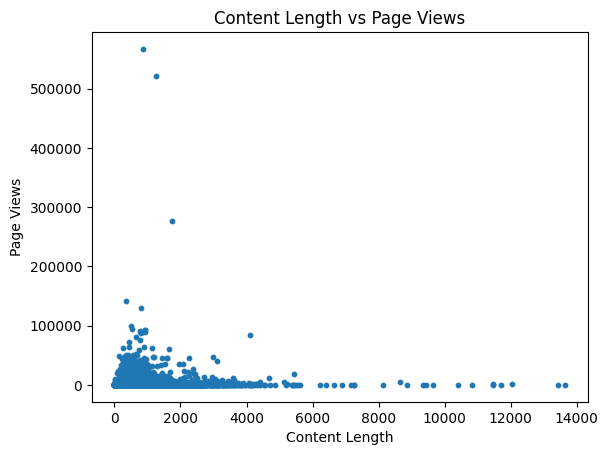

In [ ]:
#content length vs pageviews
plt.scatter(dp_df['content_length'], dp_df['pageViews'], s = 10)
plt.xlabel('Content Length')
plt.ylabel('Page Views')
plt.title('Content Length vs Page Views')
plt.show()

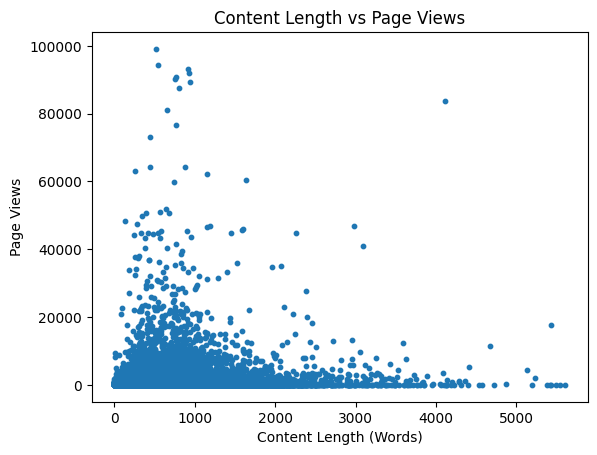

In [ ]:
#got rid of outliers greatest
dp_df_no_outliers = dp_df[(dp_df['content_length'] <= 6000) & (dp_df['pageViews'] <= 100000)]

plt.scatter(dp_df_no_outliers['content_length'], dp_df_no_outliers['pageViews'], s = 10)
plt.xlabel('Content Length (Words)')
plt.ylabel('Page Views')
plt.title('Content Length vs Page Views')
plt.show()




In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')  # Use a regular expression to match only word characters

def tokenize_and_length(text):
    tokens = tokenizer.tokenize(text.lower())  # Tokenize the text into lowercase words only
    length = len(tokens)
    return tokens, length

dp_df[['token_words', 'content_word_length']] = dp_df['content'].apply(tokenize_and_length).apply(pd.Series)
dp_df


,id,srn,title,slug,content,published_date,title_url,source,pageViews,tokens,content_length,token_words,content_word_length
0,142732,166eff0e-c9b4-4990-9dfe-a3e694414425,Cramped class requirements limit nurses and en...,study-abroad-by-the-numbers,"For many students, study abroad is an integral...",1970-01-01 06:00:00,1970/01/study-abroad-by-the-numbers,dp,429.0,"[For, many, students, ,, study, abroad, is, an...",1323,"[for, many, students, study, abroad, is, an, i...",1228
1,142263,17dc519b-d72a-4237-8537-c162b622352b,New Study Abroad Director eager to expand and ...,new-abroad-director,“Tell me about France!” Nigel Cossar exclaims ...,1970-01-01 12:00:00,1970/01/new-abroad-director,dp,206.0,"[“, Tell, me, about, France, !, ”, Nigel, Coss...",815,"[tell, me, about, france, nigel, cossar, excla...",736
2,142685,01b12122-5935-4297-9270-7110f1bc61db,Emergencies abroad: how Penn keeps students safe,penn-abroad-deals-with-emergencies-overseas,"When disaster struck in Paris last week, Penn ...",1970-01-02 00:00:00,1970/01/penn-abroad-deals-with-emergencies-ove...,dp,259.0,"[When, disaster, struck, in, Paris, last, week...",983,"[when, disaster, struck, in, paris, last, week...",900
3,144409,9ecaf929-0a2a-476f-abce-cd8ba884d28d,The challenges of finding a long-term provider...,caps-referrals-for-long-term-care,While Counseling and Psychological Services fu...,1970-01-02 02:00:00,1970/01/caps-referrals-for-long-term-care,dp,176.0,"[While, Counseling, and, Psychological, Servic...",560,"[while, counseling, and, psychological, servic...",529
4,67904,36df6619-9184-45fc-8842-63e417954645,Nine faculty members awarded for teaching,nine_faculty_members_awarded_for_teaching,"This year's winners of the Lindback Award, the...",1990-04-17 09:00:00,1990/04/nine_faculty_members_awarded_for_teaching,dp,8.0,"[This, year, 's, winners, of, the, Lindback, A...",654,"[this, year, s, winners, of, the, lindback, aw...",569
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68882,204845,fe54e7ee-11d1-4026-aea5-235fe2ed484b,Gregory Bowman named Penn Integrates Knowledge...,penn-integrates-knowledge-gregory-bowman-engin...,"The University appointed Gregory Bowman, a pro...",2023-04-06 23:17:20,2023/04/penn-integrates-knowledge-gregory-bowm...,dp,77.0,"[The, University, appointed, Gregory, Bowman, ...",368,"[the, university, appointed, gregory, bowman, ...",318
68883,204957,ee7e9fe8-cbd4-4b20-95ef-3aa541008717,"Losing every game, loving every moment: Mike M...",penn-womens-basketball-coach-mike-mclaughlin-w...,Long before Mike McLaughlin strode the sidelin...,2023-04-07 00:08:09,2023/04/penn-womens-basketball-coach-mike-mcla...,dp,299.0,"[Long, before, Mike, McLaughlin, strode, the, ...",922,"[long, before, mike, mclaughlin, strode, the, ...",791
68884,204956,af45a9a1-1760-4fcd-85d7-dd56c0d3128c,Jonathan Condon of men’s rowing is racing to t...,penn-mens-rowing-captain-jonathan-condon-heavy...,Adaptability has been a prominent theme of hea...,2023-04-07 01:05:46,2023/04/penn-mens-rowing-captain-jonathan-cond...,dp,268.0,"[Adaptability, has, been, a, prominent, theme,...",1013,"[adaptability, has, been, a, prominent, theme,...",884
68885,204973,31b3d3c4-b771-42bc-8fb1-a87d8af3bf4b,"Penn holds i care training, teaching students ...",penn-i-care-training-counseling-mental-health,Penn held a training session for students that...,2023-04-07 02:54:38,2023/04/penn-i-care-training-counseling-mental...,dp,123.0,"[Penn, held, a, training, session, for, studen...",559,"[penn, held, a, training, session, for, studen...",507


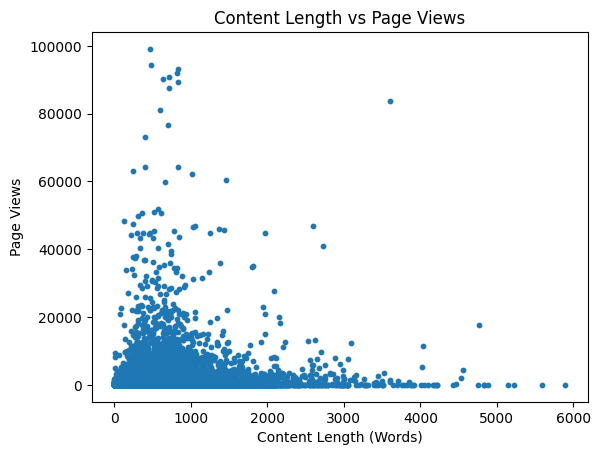

In [ ]:
dp_df_no_outliers = dp_df[(dp_df['content_word_length'] <= 6000) & (dp_df['pageViews'] <= 100000)]

plt.scatter(dp_df_no_outliers['content_word_length'], dp_df_no_outliers['pageViews'], s = 10)
plt.xlabel('Content Length (Words)')
plt.ylabel('Page Views')
plt.title('Content Length vs Page Views')
plt.show()

## Hotwords Tokenizer

In [ ]:
import spacy
from collections import Counter
from string import punctuation

#getting top 5 hotwords from each article
nlp = spacy.load("en_core_web_sm")
def get_hotwords(text):
   result = []
   pos_tag = ['PROPN', 'ADJ', 'NOUN']
   doc = nlp(text.lower())
   for token in doc:
       if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
           continue
       if(token.pos_ in pos_tag):
           result.append(token.text)
   counter = Counter(result)
   return [word for word, count in counter.most_common(5)]

In [ ]:
#get all top words
top_words = dp_df['title'].apply(get_hotwords)
top_words_df = pd.DataFrame({'pageViews': dp_df['pageViews'], 'top_words': top_words})

#top words vs page views
top_words_df = top_words_df.explode('top_words')
top_words_grouped = top_words_df.groupby('top_words')['pageViews'].mean().sort_values(ascending=False)

In [ ]:
top_words

0        [class, requirements, nurses, engineers, study]
1                 [new, study, director, eager, program]
2                    [emergencies, penn, students, safe]
3               [challenges, long, term, provider, caps]
4                                     [faculty, members]
                              ...                       
68882     [gregory, bowman, penn, integrates, knowledge]
68883       [game, moment, mike, mclaughlin, washington]
68884            [jonathan, condon, men, rowing, finish]
68885         [penn, training, students, mental, health]
68886    [kampton, kam, international, students, access]
Name: title, Length: 68887, dtype: object

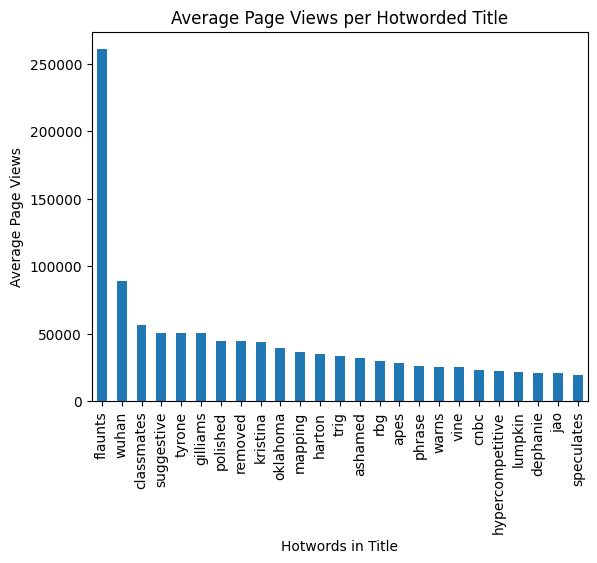

In [ ]:
#average page views vs for each hotword
top_words_grouped = top_words_grouped.head(25)
top_words_grouped.plot(kind='bar')
plt.xlabel('Hotwords in Title')
plt.ylabel('Average Page Views')
plt.title('Average Page Views per Hotworded Title')
plt.show()

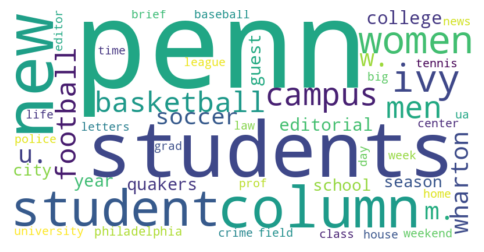

In [ ]:
from wordcloud import WordCloud
all_words = [word for title in top_words for word in title]

# count the frequency of each word
word_freq = pd.Series(all_words).value_counts()

# Generate & plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42, max_words=50).generate_from_frequencies(word_freq)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


##Sentiment Analysis EDA

In [ ]:
!pip install spacytextblob

In [ ]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# Make sure titles are all of type string
dp_df['title'] = dp_df['title'].astype('str')

#Sentiment Score Function via SpaCy
def get_sentiment_score(text):
    doc = nlp(text)
    return doc._.blob.polarity                          

# add sentiment column to dataframe
dp_df['Sentiment'] = dp_df['title'].apply(get_sentiment_score)


In [ ]:
import numpy as np
import plotly.express as px

# Group articles by topic, Calculate average sentiment score for each genre
topic_sentiments = dp_df.groupby('Max Topic Index')['Sentiment'].mean().reset_index()

# Sort genres by average sentiment score
topic_sentiments = topic_sentiments.sort_values('Sentiment')

# Created visual bar graph of Avg Sentimet Score vs Genre
fig = px.bar(topic_sentiments, x='Max Topic Index', y='Sentiment',
             labels={'Max Topic Index': 'Genre', 'Sentiment': 'Average Sentiment Score'})

fig.update_layout(title='Average Sentiment Scores by Genre')
fig.show()

In [ ]:
# Group articles by year, Calculate average sentiment score for each year
year_sentiments = dp_df.groupby('year')['Sentiment'].mean().reset_index()

# Create visual scatter plot of Avg Sentiment Score vs Year
fig = px.scatter(year_sentiments, x='year', y='Sentiment', trendline='lowess',
                 labels={'Year': 'Year', 'Sentiment': 'Average Sentiment Score'})

fig.update_layout(title='Average Sentiment Score by Year')
fig.show()


# Modeling


##Topic Modeling

### Data Preprocess and Find Optimal Number of Genres

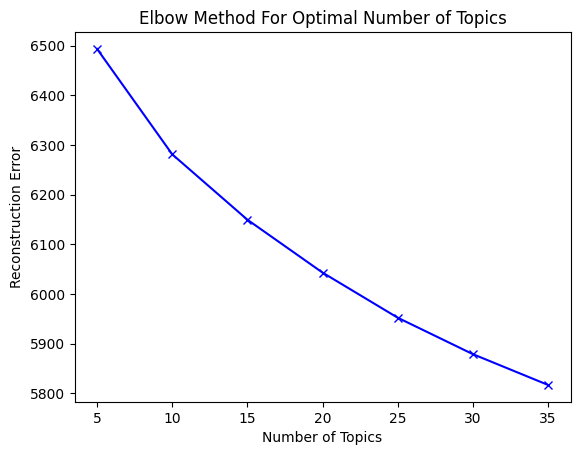

In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

#Define Tokenizer Function
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

#Tokenize the content of each article in the dataset
dp_df['tokens'] = dp_df['content'].apply(tokenize)

# Create a CountVectorizer object to generate the document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_features=5000)

# Create document-term matrix based on tokenized content
dtm = vectorizer.fit_transform(dp_df['tokens'])

# Define a range of numbers of topics to try
num_topics_range = range(5, 40, 5)

# Calculate the NMF models and their reconstruction errors for each number of topics
reconstruction_errors = []
for num_topics in num_topics_range:
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(dtm)
    reconstruction_error = nmf_model.reconstruction_err_
    reconstruction_errors.append(reconstruction_error)

# Plot the reconstruction errors as a function of the number of topics
# Find elbow of curve to find optimal number of topics/genres
plt.plot(num_topics_range, reconstruction_errors, 'bx-')
plt.xlabel('Number of Topics')
plt.ylabel('Reconstruction Error')
plt.title('Elbow Method For Optimal Number of Topics')
plt.show()

### Train NMF Model to find Each Article's Best Genre

In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF


# Create a CountVectorizer object to generate the document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_features=5000)

# Create document-term matrix
dtm = vectorizer.fit_transform(dp_df['tokens'])

# Define the number of topics based off of Elbow Curve
num_topics = 30

# Train the NMF model on the document-term matrix
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(dtm)

# Print the topics and their top words
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [list(vectorizer.vocabulary_.keys())[i] for i in topic.argsort()[:-11:-1]]
    print("Topic {}: {}".format(topic_idx, top_words))

# Assign the topics to each article
topic_scores = []
for i in range(len(data)):
    doc_dtm = vectorizer.transform([data['title'][i]])
    doc_topic_scores = nmf_model.transform(doc_dtm)
    topic_scores.append(doc_topic_scores.tolist()[0])
dp_df['Topic Scores'] = topic_scores

# Assign sentiment scores to each topic
sentiment_scores = np.random.rand(num_topics)
topic_sentiments = []
for i in range(len(data)):
    topic_sentiment = np.dot(data['Sentiment'][i], sentiment_scores)
    topic_sentiments.append(topic_sentiment)
dp_df['Topic Sentiments'] = topic_sentiments


Topic 0: ['terrible', 'planned', 'choosing', 'offering', 'walls', 'easily', '1987', 'attempted', 'goalie', 'eiter']
Topic 1: ['august', 'indian', 'row', 'indication', 'glass', 'homes', 'training', 'remained', 'unprecedented', 'reina']
Topic 2: ['mba', 'entrepreneurial', 'freshmen', 'managed', 'jerry', 'awesome', '2015', 'renovation', 'america', 'typically']
Topic 3: ['authors', 'worker', 'fair', 'captains', 'squads', 'extent', 'shirts', 'cable', 'rose', 'powell']
Topic 4: ['alleged', 'renowned', '97', '2019', 'education', 'attempt', 'fortunate', 'believes', 'answered', 'details']
Topic 5: ['francisco', 'jerry', 'rush', 'pay', 'expensive', 'ends', 'privacy', 'sheldon', 'introduction', 'philadelphia']
Topic 6: ['training', 'title', '97', 'grace', 'choosing', 'rotation', 'ease', 'offering', 'advocacy', 'walls']
Topic 7: ['conditioning', 'coast', 'thousands', '2019', 'latest', 'sweep', 'markets', 'threatening', 'sent', 'physicians']
Topic 8: ['took', 'signs', 'francisco', 'privacy', 'beta'

### Train (again) and Test Model

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a testing set via 80/20 split
train_data, test_data = train_test_split(articles_df, test_size=0.2, random_state=42)

# Create a CountVectorizer object to generate the document-term matrix
vectorizer = CountVectorizer(stop_words='english', max_features=5000)

# Create document-term matrix using training set
train_dtm = vectorizer.fit_transform(train_data['content'])

# Define the number of topics
num_topics = 30

# Train the NMF model on the document-term matrix using training set
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(train_dtm)

# Create document-term matrix using testing set
test_dtm = vectorizer.transform(test_data['content'])

# Use the NMF model to transform the testing set into a topic matrix
test_topic_matrix = nmf_model.transform(test_dtm)


In [ ]:
test_data = test_data.reset_index(drop=True)

# Assign the topics to each article
topic_scores = []
for i in range(len(test_data)):
    doc_dtm = vectorizer.transform([test_data['title'][i]])
    doc_topic_scores = nmf_model.transform(doc_dtm)
    topic_scores.append(doc_topic_scores.tolist()[0])
test_data['Topic Scores'] = topic_scores

# Find Max Topic Score, then assign appropriate genre label to each article
max_scores = []
max_indices = []
for topic_scores in test_data['Topic Scores']:
    max_index = max(range(len(topic_scores)), key=topic_scores.__getitem__)
    max_indices.append(max_index)
    max_scores.append(topic_scores[max_index])


test_data['Max Topic Index'] = max_indices

### Evaluate Performance of NMF Model

In [ ]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score for NMF Model
silhouette_avg = silhouette_score(test_topic_matrix, test_data['Max Topic Index'].values)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.2906534234545184


In [ ]:
max_scores = []
max_indices = []
for topic_scores in dp_df['Topic Scores']:
    max_index = max(range(len(topic_scores)), key=topic_scores.__getitem__)
    max_indices.append(max_index)
    max_scores.append(topic_scores[max_index])


dp_df['Max Topic Index'] = max_indices

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

# create the data for the bar chart
x = max_topic_index_counts_sorted.index
y = max_topic_index_counts_sorted['Max Topic Index']

# Assign color schema
colors = ['rgb(223, 247, 243)', 'rgb(197, 226, 224)', 'rgb(156, 206, 203)', 'rgb(115, 186, 190)', 'rgb(82, 158, 173)']
color_scale = [[i/len(x), color] for i, color in enumerate(colors)]

# create the bar chart using the go.Bar function with the color scale
dataaa = [go.Bar(x=x, y=y, marker=dict(colorscale=color_scale, color=y))]
layout = go.Layout(title='Number of Articles per Genre',
                   xaxis=dict(title='Genre'),
                   yaxis=dict(title='Count'))

# create bar chart
fig = go.Figure(data=dataaa, layout=layout)
pio.show(fig)

## SUPERVISED Learning Regrssion Model

### Data Preparation for Inputs/Outputs

In [ ]:
unsupervised_sentiment_df = pd.read_csv('/content/drive/MyDrive/unsupervised_sentiment_stuff (1).csv')
unsupervised_sentiment_df
#unsupervised_sentiment_df = dp_df

,id,srn,title,slug,content,published_date,title_url,source,pageViews,Sentiment,Topic Scores,Topic Sentiments,Max Topic Index
0,142732,166eff0e-c9b4-4990-9dfe-a3e694414425,Cramped class requirements limit nurses and en...,study-abroad-by-the-numbers,"For many students, study abroad is an integral...",1970-01-01 06:00:00,1970/01/study-abroad-by-the-numbers,dp,429.0,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.001004721869410273...",[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,29
1,142263,17dc519b-d72a-4237-8537-c162b622352b,New Study Abroad Director eager to expand and ...,new-abroad-director,“Tell me about France!” Nigel Cossar exclaims ...,1970-01-01 12:00:00,1970/01/new-abroad-director,dp,206.0,0.136364,"[0.0, 0.0, 0.0, 0.0, 0.0, 6.684846039683026e-0...",[0.0228397 0.09311112 0.12342449 0.10759161 0...,24
2,142685,01b12122-5935-4297-9270-7110f1bc61db,Emergencies abroad: how Penn keeps students safe,penn-abroad-deals-with-emergencies-overseas,"When disaster struck in Paris last week, Penn ...",1970-01-02 00:00:00,1970/01/penn-abroad-deals-with-emergencies-ove...,dp,259.0,0.500000,"[0.0, 0.0, 0.0, 0.0, 0.018162655423150518, 0.0...",[0.08374556 0.34140744 0.45255647 0.39450258 0...,4
3,144409,9ecaf929-0a2a-476f-abce-cd8ba884d28d,The challenges of finding a long-term provider...,caps-referrals-for-long-term-care,While Counseling and Psychological Services fu...,1970-01-02 02:00:00,1970/01/caps-referrals-for-long-term-care,dp,176.0,0.000000,"[0.0, 9.669086299296856e-05, 0.0, 0.0012811309...",[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,29
4,67904,36df6619-9184-45fc-8842-63e417954645,Nine faculty members awarded for teaching,nine_faculty_members_awarded_for_teaching,"This year's winners of the Lindback Award, the...",1990-04-17 09:00:00,1990/04/nine_faculty_members_awarded_for_teaching,dp,8.0,0.000000,"[9.37345951776273e-05, 0.0, 0.0, 0.0, 0.0, 0.0...",[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68882,204845,fe54e7ee-11d1-4026-aea5-235fe2ed484b,Gregory Bowman named Penn Integrates Knowledge...,penn-integrates-knowledge-gregory-bowman-engin...,"The University appointed Gregory Bowman, a pro...",2023-04-06 23:17:20,2023/04/penn-integrates-knowledge-gregory-bowm...,dp,77.0,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.01798390007545304, 0.0,...",[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,4
68883,204957,ee7e9fe8-cbd4-4b20-95ef-3aa541008717,"Losing every game, loving every moment: Mike M...",penn-womens-basketball-coach-mike-mclaughlin-w...,Long before Mike McLaughlin strode the sidelin...,2023-04-07 00:08:09,2023/04/penn-womens-basketball-coach-mike-mcla...,dp,299.0,0.100000,"[0.0, 0.013430795847653467, 0.0, 0.0, 0.0, 0.0...",[0.01674911 0.06828149 0.09051129 0.07890052 0...,1
68884,204956,af45a9a1-1760-4fcd-85d7-dd56c0d3128c,Jonathan Condon of men’s rowing is racing to t...,penn-mens-rowing-captain-jonathan-condon-heavy...,Adaptability has been a prominent theme of hea...,2023-04-07 01:05:46,2023/04/penn-mens-rowing-captain-jonathan-cond...,dp,268.0,0.000000,"[0.0, 0.00034097281275330394, 0.0, 0.0, 0.0180...",[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,4
68885,204973,31b3d3c4-b771-42bc-8fb1-a87d8af3bf4b,"Penn holds i care training, teaching students ...",penn-i-care-training-counseling-mental-health,Penn held a training session for students that...,2023-04-07 02:54:38,2023/04/penn-i-care-training-counseling-mental...,dp,123.0,-0.100000,"[0.0, 0.0, 0.0, 0.0, 0.01800508507169716, 0.00...",[-0.01674911 -0.06828149 -0.09051129 -0.078900...,29


In [ ]:
# one-hot encoding for the genres
one_hot_df = pd.get_dummies(unsupervised_sentiment_df['Max Topic Index'], prefix='Genre')
one_hot_df

,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,...,Genre_20,Genre_21,Genre_22,Genre_23,Genre_24,Genre_25,Genre_26,Genre_27,Genre_28,Genre_29
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68882,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68883,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68884,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
input_df = one_hot_df
input_df

,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,...,Genre_20,Genre_21,Genre_22,Genre_23,Genre_24,Genre_25,Genre_26,Genre_27,Genre_28,Genre_29
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68882,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68883,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68884,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#add year to features
other_input = pd.read_csv('/content/drive/MyDrive/supervised_inputs.csv')
other_input["Year"] = pd.to_datetime(dp_df['published_date']).dt.year

#normalize the length of tokenized content
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
other_input['Length'] = scaler.fit_transform(other_input[['Length']])

In [ ]:
output_df = np.log(dp_df[["pageViews"]])

In [ ]:
other_input = other_input[["Sentiment", "Length", "Year"]]
input_df = pd.concat([input_df, other_input], axis=1)

In [ ]:
#combine this as final input features
input_df

,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,...,Genre_23,Genre_24,Genre_25,Genre_26,Genre_27,Genre_28,Genre_29,Sentiment,Length,Year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.000000,0.096895,1970
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.136364,0.059689,1970
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.500000,0.071994,1970
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.000000,0.041014,1970
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.047898,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68882,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.026952,2023
68883,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.100000,0.067526,2023
68884,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0.074191,2023
68885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.100000,0.040940,2023


### Quick EDA for feature inputs

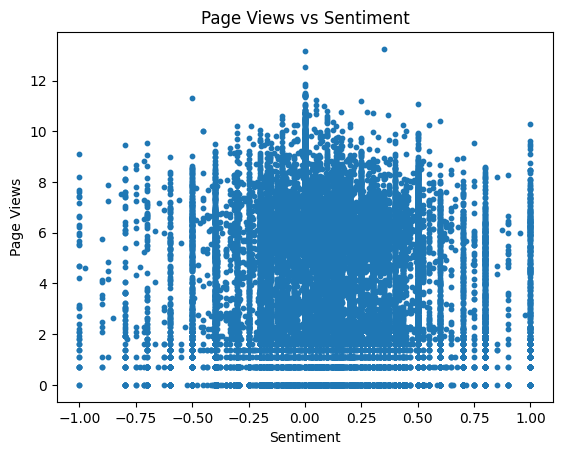

In [ ]:
plt.scatter(input_df['Sentiment'], output_df['pageViews'], s=10)
plt.xlabel('Sentiment')
plt.ylabel('Page Views')
plt.title('Page Views vs Sentiment')
plt.show()

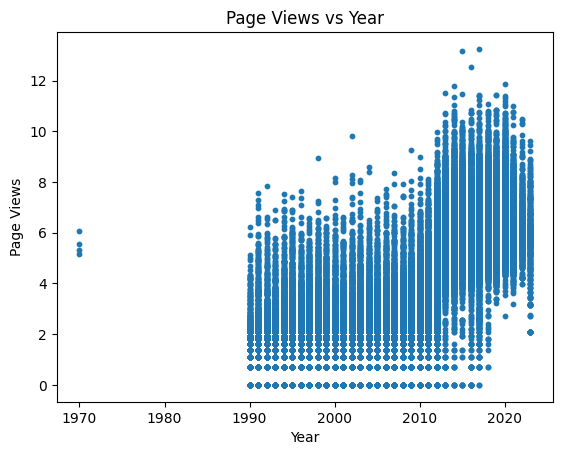

In [ ]:
plt.scatter(input_df['Year'], output_df['pageViews'], s=10)
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.title('Page Views vs Year')
plt.show()

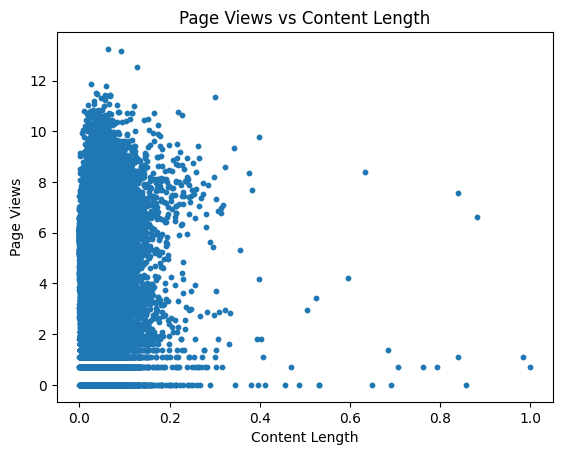

In [ ]:
plt.scatter(input_df['Length'], output_df['pageViews'], s = 10)
plt.xlabel('Content Length')
plt.ylabel('Page Views')
plt.title('Page Views vs Content Length')
plt.show()

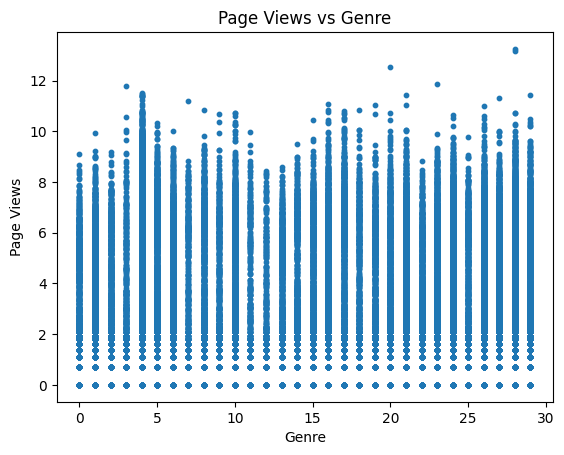

In [ ]:
plt.scatter(unsupervised_sentiment_df['Max Topic Index'], output_df['pageViews'], s = 10)
plt.xlabel('Genre')
plt.ylabel('Page Views')
plt.title('Page Views vs Genre')
plt.show()
# unsupervised_sentiment_df

### Linear Regression with sklearn

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [ ]:
#split and train model
input_train, input_test, output_train, output_test = train_test_split(input_df, output_df, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(input_train, output_train)

# Make predictions on the test set
predictions = model.predict(input_test)

LinearRegression()

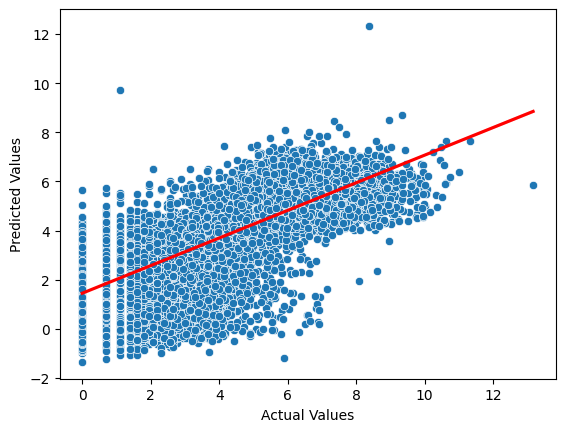

In [ ]:
# Graph results
sns.scatterplot(x=output_test.values.flatten(), y=predictions.flatten())
# Add a line of best fit
sns.regplot(x=output_test.values.flatten(), y=predictions.flatten(), scatter=False, color = "red")

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
#get r-squared value to see correlation
output_pred = model.predict(input_test)
r2_score(output_test, output_pred)

0.5653613334650889

In [ ]:
#calculate mean absolute error
output_pred = model.predict(input_test)
mae = mean_absolute_error(output_test, output_pred)
print(f'MAE: {mae:.4f}')

MAE: 1.3604


In [ ]:
test_accuracy = model.score(input_test, output_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.5654


### PyTorch Deep Learning Model

In [ ]:
import torch
import torch.nn as nn

# Define PyTorch model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, 16)
        # self.dropout = nn.Dropout(p=0.1)
        self.linear2 = nn.Linear(16, 1)
        
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        # x = self.dropout(x)
        return self.linear2(x)


# pandas df to numpy arrays
inputs_train = input_train.values.astype(np.float32)
outputs_train = output_train.values.astype(np.float32)
inputs_test = input_test.values.astype(np.float32)
outputs_test = output_test.values.astype(np.float32)

# numpy arrays to PyTorch tensors
inputs_train = torch.tensor(inputs_train, dtype=torch.float32)
outputs_train = torch.tensor(outputs_train, dtype=torch.float32)
inputs_test = torch.tensor(inputs_test, dtype=torch.float32)
outputs_test = torch.tensor(outputs_test, dtype=torch.float32)


model = RegressionModel(input_df.shape[1])

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#store losses
train_losses = []

# Train the model for 5000 epochs
num_epochs = 5000
for epoch in range(num_epochs):
    inputs = inputs_train
    outputs = outputs_train

    # Forward pass
    predictions = model(inputs)
    loss = criterion(predictions, outputs)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #add loss to array
    train_losses.append(loss.item())

    # Print the loss for every 100 epochs
    if (epoch % 100 == 0):
      print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate for test set
with torch.no_grad():
    inputs = inputs_test
    outputs = outputs_test

    predictions = model(inputs)

    predictions_np = predictions.detach().numpy()
    outputs_np = outputs.numpy()

    # MSE loss
    test_loss = criterion(predictions, outputs)
    print(f'Test Loss: {test_loss.item():.4f}')

    # mean average error
    average_error = np.mean(np.abs(predictions_np - outputs_np), axis=0)
    print(f'Average Test Error: {float(average_error):.4f}')


Epoch [0/5000], Loss: 22432.4551
Epoch [100/5000], Loss: 6.6013
Epoch [200/5000], Loss: 6.4801
Epoch [300/5000], Loss: 6.4479
Epoch [400/5000], Loss: 6.4106
Epoch [500/5000], Loss: 6.3697
Epoch [600/5000], Loss: 6.3263
Epoch [700/5000], Loss: 6.2812
Epoch [800/5000], Loss: 6.2355
Epoch [900/5000], Loss: 6.1897
Epoch [1000/5000], Loss: 6.1445
Epoch [1100/5000], Loss: 6.1007
Epoch [1200/5000], Loss: 6.0585
Epoch [1300/5000], Loss: 6.0187
Epoch [1400/5000], Loss: 5.9814
Epoch [1500/5000], Loss: 5.9470
Epoch [1600/5000], Loss: 5.9159
Epoch [1700/5000], Loss: 5.8880
Epoch [1800/5000], Loss: 5.8634
Epoch [1900/5000], Loss: 5.8422
Epoch [2000/5000], Loss: 5.8243
Epoch [2100/5000], Loss: 5.8093
Epoch [2200/5000], Loss: 5.7971
Epoch [2300/5000], Loss: 5.7874
Epoch [2400/5000], Loss: 5.7798
Epoch [2500/5000], Loss: 5.7740
Epoch [2600/5000], Loss: 5.7696
Epoch [2700/5000], Loss: 5.7665
Epoch [2800/5000], Loss: 5.7642
Epoch [2900/5000], Loss: 5.7625
Epoch [3000/5000], Loss: 5.7613
Epoch [3100/5000

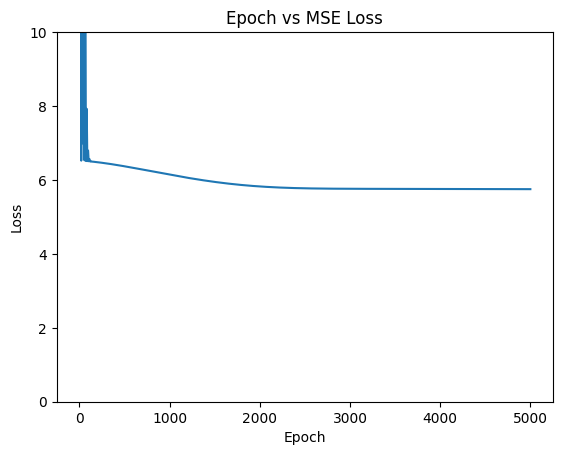

In [ ]:
# epoch vs loss graph
plt.plot(range(num_epochs), train_losses)
plt.title('Epoch vs MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 10)
plt.show()

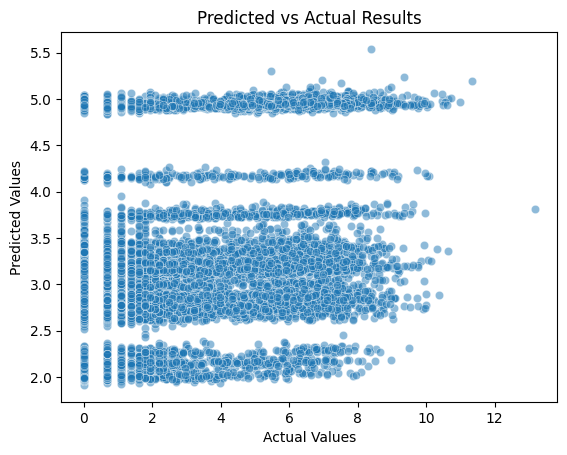

In [ ]:
#plot PyTorch predictions vs target
sns.scatterplot(x=outputs_np.flatten(), y=predictions_np.flatten(), alpha=0.5)

plt.title('Predicted vs Actual Results')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

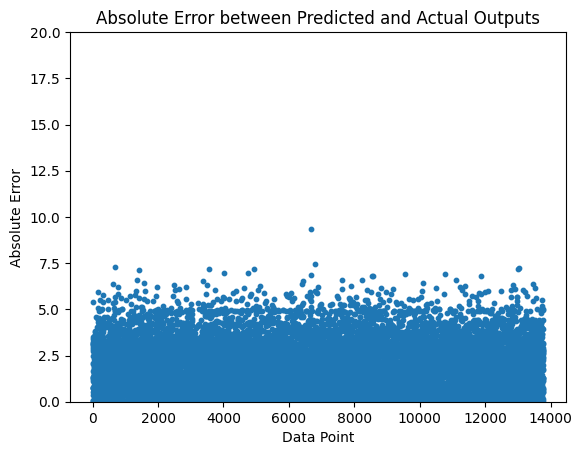

In [ ]:
predictions_numpy = predictions.detach().numpy()
outputs_test_numpy= outputs_test.detach().numpy()

# Get absolute error between predicted and actual outputs
error = np.abs(predictions_numpy - outputs_test_numpy)

# Plot the error
plt.scatter(np.arange(len(error)), error, s=10)
plt.ylim(0, 20)
plt.xlabel('Data Point')
plt.ylabel('Absolute Error')
plt.title('Absolute Error between Predicted and Actual Outputs')
plt.show()


In [ ]:
#extra polynomial sklearn model, not incoporated in writeup

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2)

inputs_train_poly = poly_transformer.fit_transform(inputs_train)
inputs_test_poly = poly_transformer.transform(inputs_test)

model = LinearRegression()

# Train the model
model.fit(inputs_train_poly, outputs_train)

outputs_test = torch.tensor(outputs_test, dtype=torch.float32)

# Evaluate for test data
predictions = model.predict(inputs_test_poly)
test_loss = np.mean((predictions - outputs_test.numpy())**2)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 2.3661


<ipython-input-326-2c42cd5d826b>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_test = torch.tensor(outputs_test, dtype=torch.float32)


In [ ]:
mae = mean_absolute_error(outputs_test, predictions)
print(f'MAE: {mae:.4f}')

MAE: 1.2304


### Other Linear Regression by Genre

In [ ]:
#input features for a specific genre
genre_0_train = input_df[["Genre_29", "Sentiment", "Length", "Year"]]
genre_0_train = genre_0_train[genre_0_train["Genre_29"] == 1]
genre_0_train

,Genre_29,Sentiment,Length,Year
0,1,0.00,0.096895,1970
3,1,0.00,0.041014,1970
11,1,0.00,0.040208,1990
24,1,-0.05,0.022924,1990
60,1,0.00,0.051121,1990
...,...,...,...,...
68794,1,0.00,0.030467,2023
68805,1,-0.05,0.028856,2023
68842,1,0.00,0.060056,2023
68867,1,0.00,0.035374,2023


In [ ]:
#target
genre_0_test = unsupervised_sentiment_df[unsupervised_sentiment_df["Max Topic Index"] == 29][["pageViews"]]
genre_0_test = np.log(genre_0_test)
genre_0_test

,pageViews
0,6.061457
3,5.170484
11,2.564949
24,1.386294
60,2.564949
...,...
68794,5.932245
68805,4.615121
68842,5.908083
68867,3.663562


In [ ]:
#train model
input_train, input_test, output_train, output_test = train_test_split(genre_0_train, genre_0_test, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(input_train, output_train)

# test set predictions
predictions = model.predict(input_test)

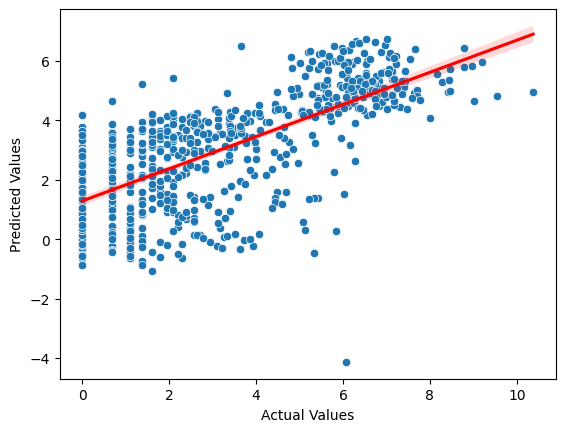

In [ ]:
# scatter plot
sns.scatterplot(x=output_test.values.flatten(), y=predictions.flatten())
# line of best fit
sns.regplot(x=output_test.values.flatten(), y=predictions.flatten(), scatter=False, color = "red")

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
output_pred = model.predict(input_test)
mae = mean_absolute_error(output_test, output_pred)
print(f'MAE: {mae:.4f}')

MAE: 1.4280


In [ ]:
#r-squared score
output_pred = model.predict(input_test)
r2_score(output_test, output_pred)

0.4679263627921383

In [ ]:
#tokenized by top 5 keywords for each article's content
extra = pd.read_csv('/content/drive/MyDrive/dp_combined_tokenized.csv')

In [ ]:
extra

,index,id,srn,title,slug,content,published_date,title_url,source,pageViews,keywords
0,0,142732,166eff0e-c9b4-4990-9dfe-a3e694414425,Cramped class requirements limit nurses and en...,study-abroad-by-the-numbers,"For many students, study abroad is an integral...",1970-01-01 06:00:00,1970/01/study-abroad-by-the-numbers,dp,429.0,"['students', 'study', 'penn', 'program', 'expe..."
1,1,142263,17dc519b-d72a-4237-8537-c162b622352b,New Study Abroad Director eager to expand and ...,new-abroad-director,“Tell me about France!” Nigel Cossar exclaims ...,1970-01-01 12:00:00,1970/01/new-abroad-director,dp,206.0,"['penn', 'cossar', 'students', 'programs', 'un..."
2,2,142685,01b12122-5935-4297-9270-7110f1bc61db,Emergencies abroad: how Penn keeps students safe,penn-abroad-deals-with-emergencies-overseas,"When disaster struck in Paris last week, Penn ...",1970-01-02 00:00:00,1970/01/penn-abroad-deals-with-emergencies-ove...,dp,259.0,"['penn', 'students', 'paris', 'email', 'securi..."
3,3,144409,9ecaf929-0a2a-476f-abce-cd8ba884d28d,The challenges of finding a long-term provider...,caps-referrals-for-long-term-care,While Counseling and Psychological Services fu...,1970-01-02 02:00:00,1970/01/caps-referrals-for-long-term-care,dp,176.0,"['students', 'caps', 'penn', 'insurance', 'care']"
4,4,67904,36df6619-9184-45fc-8842-63e417954645,Nine faculty members awarded for teaching,nine_faculty_members_awarded_for_teaching,"This year's winners of the Lindback Award, the...",1990-04-17 09:00:00,1990/04/nine_faculty_members_awarded_for_teaching,dp,8.0,"['award', 'professor', 'winners', 'candidates'..."
...,...,...,...,...,...,...,...,...,...,...,...
68882,68882,204845,fe54e7ee-11d1-4026-aea5-235fe2ed484b,Gregory Bowman named Penn Integrates Knowledge...,penn-integrates-knowledge-gregory-bowman-engin...,"The University appointed Gregory Bowman, a pro...",2023-04-06 23:17:20,2023/04/penn-integrates-knowledge-gregory-bowm...,dp,77.0,"['bowman', 'penn', 'university', 'professor', ..."
68883,68883,204957,ee7e9fe8-cbd4-4b20-95ef-3aa541008717,"Losing every game, loving every moment: Mike M...",penn-womens-basketball-coach-mike-mclaughlin-w...,Long before Mike McLaughlin strode the sidelin...,2023-04-07 00:08:09,2023/04/penn-womens-basketball-coach-mike-mcla...,dp,299.0,"['mclaughlin', 'basketball', 'coach', 'general..."
68884,68884,204956,af45a9a1-1760-4fcd-85d7-dd56c0d3128c,Jonathan Condon of men’s rowing is racing to t...,penn-mens-rowing-captain-jonathan-condon-heavy...,Adaptability has been a prominent theme of hea...,2023-04-07 01:05:46,2023/04/penn-mens-rowing-captain-jonathan-cond...,dp,268.0,"['condon', 'penn', 'sport', 'rowing', 'team']"
68885,68885,204973,31b3d3c4-b771-42bc-8fb1-a87d8af3bf4b,"Penn holds i care training, teaching students ...",penn-i-care-training-counseling-mental-health,Penn held a training session for students that...,2023-04-07 02:54:38,2023/04/penn-i-care-training-counseling-mental...,dp,123.0,"['training', 'penn', 'spiegel', 'students', 'a..."
